<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M30_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M√≥dulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biol√≥gicos para segmentar diferentes esp√©cies de pinguins com base em caracter√≠sticas f√≠sicas. Esta abordagem destaca a versatilidade do K-means para diversas √°reas al√©m de vendas e marketing.

A base de dados utilizada √© a penguins do pacote seaborn, que cont√©m informa√ß√µes sobre tr√™s esp√©cies de pinguins: Adelie, Chinstrap e Gentoo. As vari√°veis dispon√≠veis incluem medi√ß√µes f√≠sicas dos pinguins coletadas na Ant√°rtica.

species: Esp√©cie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em mil√≠metros

bill_depth_mm: Profundidade do bico em mil√≠metros

flipper_length_mm: Comprimento da barbatana em mil√≠metros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observa√ß√£o foi feita

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

penguins = sns.load_dataset('penguins')

In [15]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

# 1 - Nesse exerc√≠cio voc√™s devem verificar se temos vari√°veis missing, faltantes e excluir esses valores do dataset, tamb√©m devem excluir as colunas com valores categ√≥ricos, que n√£o utilizazam para o Kmeans.

In [16]:
# Verificar valores faltantes
print(penguins.isnull().sum())

# Excluir linhas com valores faltantes
penguins_clean = penguins.dropna()

# Excluir colunas categ√≥ricas
penguins_kmeans = penguins_clean.drop(columns=['species', 'island', 'sex'])

# Verificar o dataset final
print(penguins_kmeans.head())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


# 2 - Visualize a an√°lise descritiva dos seus dados utilizando a fun√ß√£o vista em aula pairplot. √â poss√≠vel j√° identificar poss√≠veis agrupamentos? Se sim, quantos?

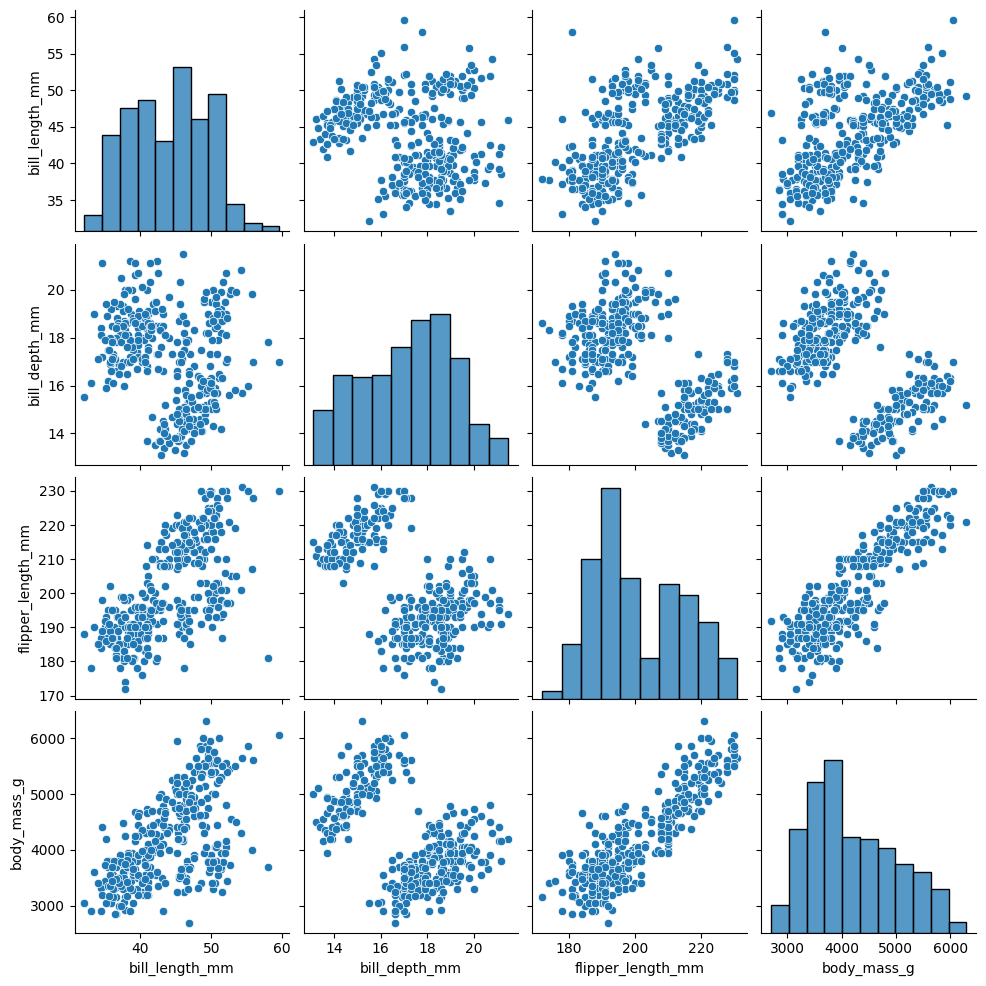

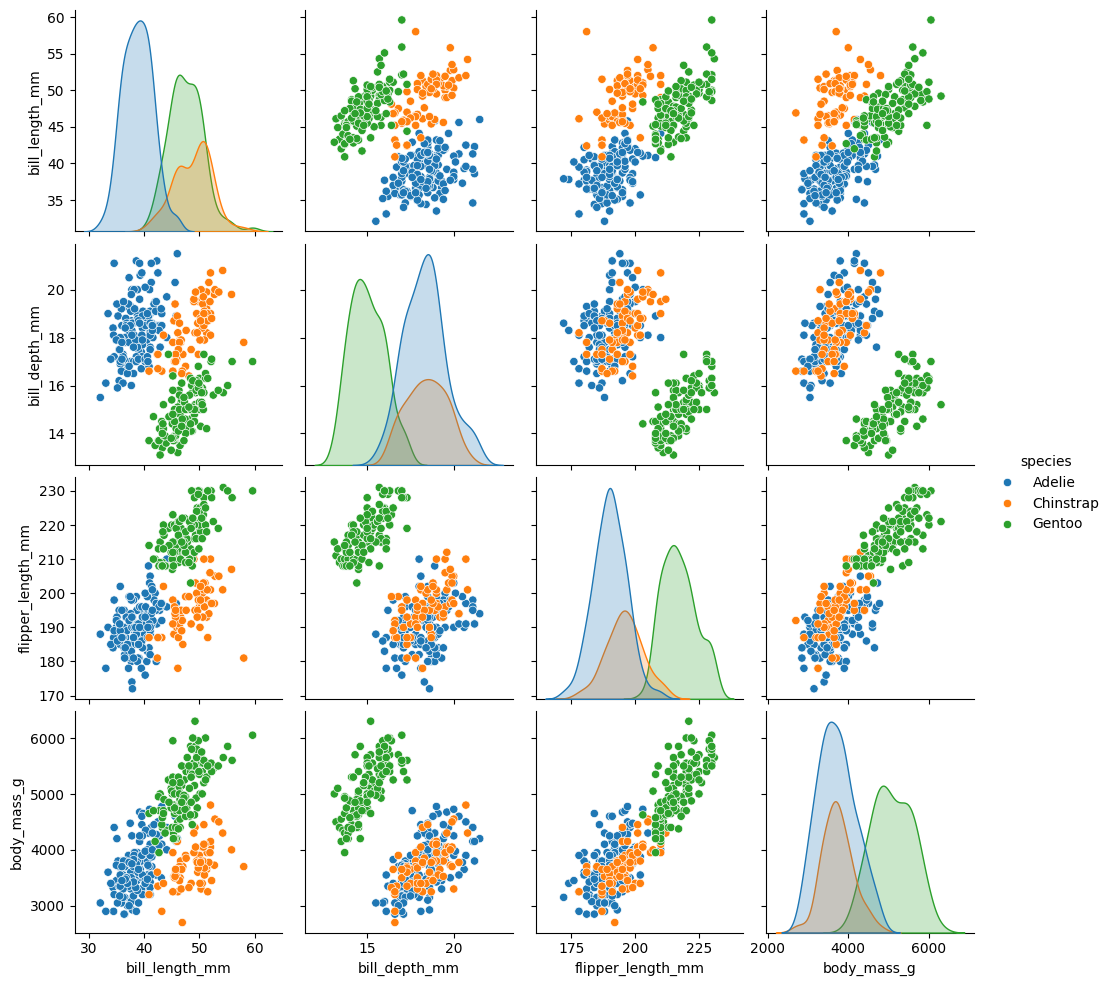

In [18]:
# Pairplot sem cores (apenas os dados num√©ricos)
sns.pairplot(penguins_kmeans)
plt.show()

# Pairplot com cores para as esp√©cies reais (apenas para compara√ß√£o)
sns.pairplot(penguins_clean, hue='species')
plt.show()

Sim, 3 Agrupamentos

# 3 - Realize a padroniza√ß√£o dos dados e visualize os dados.

In [19]:
# Criar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados
penguins_scaled = scaler.fit_transform(penguins_kmeans)

# Transformar de volta em DataFrame para visualiza√ß√£o
penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=penguins_kmeans.columns)

# Visualizar os primeiros registros padronizados
print(penguins_scaled_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que √© que a quantidade de esp√©cies que temos na base.

In [20]:
# Criar o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Treinar o modelo
kmeans.fit(penguins_scaled_df)

# Obter os r√≥tulos dos clusters
labels = kmeans.labels_

# Adicionar os r√≥tulos ao DataFrame original para an√°lise
penguins_scaled_df['cluster'] = labels

# Visualizar os primeiros registros com o cluster
print(penguins_scaled_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0       -0.896042       0.780732          -1.426752    -0.568475        0
1       -0.822788       0.119584          -1.069474    -0.506286        0
2       -0.676280       0.424729          -0.426373    -1.190361        0
3       -1.335566       1.085877          -0.569284    -0.941606        0
4       -0.859415       1.747026          -0.783651    -0.692852        0


# 5 - Construa pelo 2 matriz de dispers√£o como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gr√°fico e em seguida escolha outras variaveis para o segundo.**

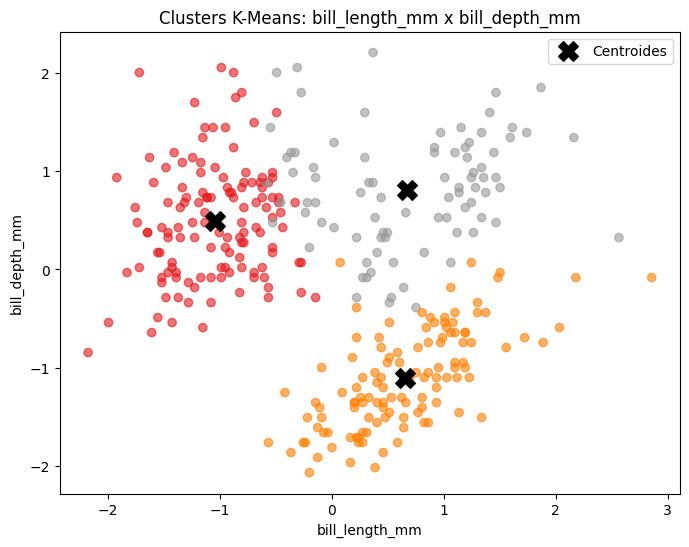

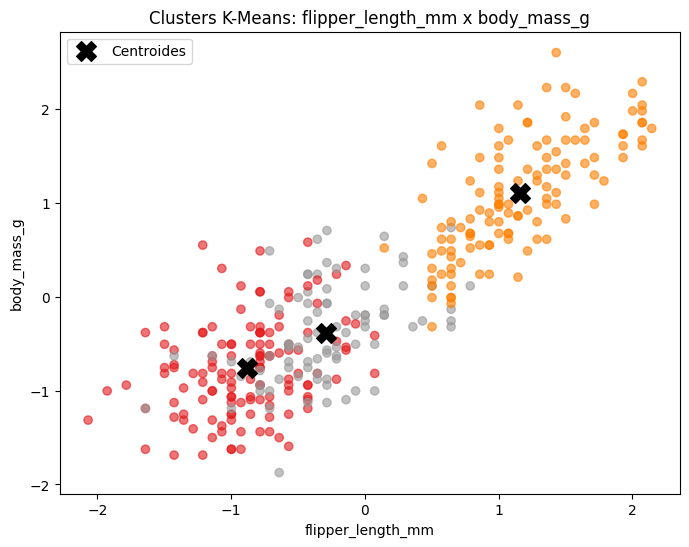

In [23]:
# Obter os centroides
centroids = kmeans.cluster_centers_

# Primeiro gr√°fico: bill_length_mm x bill_depth_mm
plt.figure(figsize=(8,6))
plt.scatter(penguins_scaled_df['bill_length_mm'], penguins_scaled_df['bill_depth_mm'], c=penguins_scaled_df['cluster'], cmap='Set1', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroides')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('Clusters K-Means: bill_length_mm x bill_depth_mm')
plt.legend()
plt.show()

# Segundo gr√°fico: flipper_length_mm x body_mass_g
plt.figure(figsize=(8,6))
plt.scatter(penguins_scaled_df['flipper_length_mm'], penguins_scaled_df['body_mass_g'], c=penguins_scaled_df['cluster'], cmap='Set1', alpha=0.6)
plt.scatter(centroids[:,2], centroids[:,3], c='black', marker='X', s=200, label='Centroides')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('Clusters K-Means: flipper_length_mm x body_mass_g')
plt.legend()
plt.show()


# 6 - Pesquise mais 3 utilidades de aplica√ß√µes de algoritmos de clusteriza√ß√£o e cite abaixo:

**1Ô∏è‚É£ Detec√ß√£o de fraudes financeiras**

O que √©: Algoritmos de clusteriza√ß√£o podem organizar transa√ß√µes banc√°rias ou compras em grupos de comportamento ‚Äúnormal‚Äù.

Como funciona: Cada cliente ou transa√ß√£o tem caracter√≠sticas como valor, frequ√™ncia, localiza√ß√£o e hor√°rio. O algoritmo agrupa transa√ß√µes similares.

Benef√≠cio: Quando uma transa√ß√£o n√£o se encaixa em nenhum grupo normal (por exemplo, uma compra enorme em outro pa√≠s de madrugada), ela √© marcada como poss√≠vel fraude.

Exemplo: Um cart√£o de cr√©dito normalmente usado no Brasil √© de repente usado em outro continente; o sistema de clustering percebe que √© um comportamento diferente e alerta o banco automaticamente.

---

**2Ô∏è‚É£ Agrupamento de documentos ou textos**

O que √©: Clustering ajuda a organizar grandes volumes de textos ou not√≠cias em grupos com temas parecidos.

Como funciona: Cada documento √© transformado em n√∫meros que representam palavras ou t√≥picos. O algoritmo ent√£o agrupa textos com palavras ou t√≥picos semelhantes.

Benef√≠cio: Permite que grandes quantidades de informa√ß√£o sejam analisadas rapidamente, sem precisar ler tudo.

Exemplo: Um portal de not√≠cias pode automaticamente agrupar mat√©rias sobre esportes, pol√≠tica, tecnologia ou sa√∫de, ajudando o leitor a encontrar rapidamente o que interessa.

---

**3Ô∏è‚É£ An√°lise de imagens e reconhecimento de padr√µes**

O que √©: Clustering √© usado para identificar regi√µes ou objetos semelhantes dentro de imagens.

Como funciona: Cada pixel ou grupo de pixels recebe caracter√≠sticas como cor, intensidade ou textura. O algoritmo agrupa pixels com caracter√≠sticas parecidas, formando regi√µes ou padr√µes.

Benef√≠cio: Facilita diagn√≥sticos m√©dicos, organiza√ß√£o de fotos ou identifica√ß√£o de objetos.

Exemplo: Em uma resson√¢ncia magn√©tica, regi√µes que parecem anormais (como tumores) podem ser detectadas porque n√£o se encaixam nos clusters de tecido saud√°vel. Em fotos de sat√©lite, √°reas de floresta, √°gua ou cidade podem ser separadas automaticamente.

# **Meu Modulo Extra**

S√≥ Testando Algumas Coisas e Matando a Curiosidade kkk

In [28]:
# Criar hover customizado
hover_text = [
    f"Bill Length: {bl:.1f} mm<br>Bill Depth: {bd:.1f} mm<br>Flipper: {fl:.1f} mm<br>Body Mass: {bm:.0f} g"
    for bl, bd, fl, bm in zip(
        penguins_scaled_df['bill_length_mm'],
        penguins_scaled_df['bill_depth_mm'],
        penguins_scaled_df['flipper_length_mm'],
        penguins_scaled_df['body_mass_g']
    )
]

# Ajustar tamanho para ser positivo
sizes = penguins_scaled_df['flipper_length_mm'] - penguins_scaled_df['flipper_length_mm'].min() + 1

# Criar gr√°fico interativo com emoji
fig = px.scatter(
    penguins_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    text=['üêß']*len(penguins_scaled_df),  # um pinguim por ponto
    color=penguins_scaled_df['cluster'].astype(str),
    size=sizes,
    hover_name=hover_text
)

# Adicionar centroides
centroids = kmeans.cluster_centers_
fig.add_scatter(
    x=centroids[:,0],
    y=centroids[:,1],
    mode='markers',
    marker=dict(size=30, color='black', symbol='x'),
    name='Centroides'
)

# Ajustes finais
fig.update_traces(textposition='middle center')
fig.update_layout(title='Clusters K-Means de Pinguins com Centroides')
fig.show()

Objetivo do gr√°fico:
O gr√°fico foi criado para visualizar de forma interativa os clusters gerados pelo algoritmo K-Means aplicados aos dados dos pinguins. Cada ponto representa um pinguim, com a posi√ß√£o determinada pelas vari√°veis bill_length_mm (comprimento do bico) e bill_depth_mm (profundidade do bico). Os emojis de pinguins foram utilizados para tornar a visualiza√ß√£o mais intuitiva e l√∫dica.

Inten√ß√£o da an√°lise:

Avaliar como o K-Means agrupou os pinguins com base nas caracter√≠sticas f√≠sicas, permitindo identificar se os clusters correspondem √†s esp√©cies reais.

Destacar visualmente os centroides de cada cluster, que representam o ‚Äúponto m√©dio‚Äù das caracter√≠sticas de cada grupo, facilitando a interpreta√ß√£o dos padr√µes do conjunto de dados.

Demonstrar o efeito da padroniza√ß√£o das vari√°veis, garantindo que todas as caracter√≠sticas influenciem igualmente na forma√ß√£o dos clusters.

Resultados e interpreta√ß√µes poss√≠veis:

√â poss√≠vel perceber que os pinguins tendem a se agrupar em tr√™s clusters distintos, o que corresponde ao n√∫mero de esp√©cies presentes no dataset.

Diferen√ßas nos comprimentos e profundidades do bico s√£o eficazes para separar os grupos, mostrando que essas vari√°veis s√£o boas para diferenciar esp√©cies.

A utiliza√ß√£o de um gr√°fico interativo permite explorar cada ponto individualmente, observando os valores de todas as medidas do pinguim, o que pode ajudar em an√°lises mais detalhadas.

Justificativa da escolha do gr√°fico:
A escolha de um gr√°fico interativo com emojis e centroides teve como objetivo facilitar a compreens√£o visual do agrupamento, tornando a an√°lise mais acess√≠vel e did√°tica. Al√©m disso, o uso de centroids permite entender a posi√ß√£o m√©dia de cada cluster e avaliar rapidamente a qualidade do agrupamento.

In [30]:
# Ajustar tamanho para scatter3d
sizes_3d = penguins_scaled_df['body_mass_g'] - penguins_scaled_df['body_mass_g'].min() + 1

# Gr√°fico 3D com tamanho ajustado
fig = px.scatter_3d(
    penguins_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    z='flipper_length_mm',
    color=penguins_scaled_df['cluster'].astype(str),
    text=['üêß']*len(penguins_scaled_df),
    size=sizes_3d,
    hover_name=hover_text
)
fig.update_traces(textposition='top center')
fig.update_layout(title='Clusters K-Means de Pinguins em 3D')
fig.show()


Objetivo do gr√°fico:
O gr√°fico 3D foi criado para visualizar interativamente os clusters identificados pelo algoritmo K-Means, considerando tr√™s vari√°veis simultaneamente: bill_length_mm (comprimento do bico), bill_depth_mm (profundidade do bico) e flipper_length_mm (comprimento da barbatana). Cada ponto representa um pinguim, e os emojis foram utilizados para tornar a visualiza√ß√£o mais intuitiva e l√∫dica.

Inten√ß√£o da an√°lise:

Avaliar como os pinguins se distribuem no espa√ßo tridimensional com base em caracter√≠sticas f√≠sicas, permitindo identificar padr√µes e agrupamentos.

Observar se os clusters correspondem ao n√∫mero de esp√©cies presentes no dataset, verificando a capacidade do K-Means de separar grupos naturais.

Demonstrar a utilidade da visualiza√ß√£o interativa 3D, que permite rotacionar, aproximar e explorar cada ponto individualmente para uma an√°lise mais detalhada.

Resultados e interpreta√ß√µes poss√≠veis:

√â poss√≠vel perceber a forma√ß√£o de tr√™s clusters distintos, sugerindo que as medidas selecionadas s√£o eficazes para diferenciar esp√©cies de pinguins.

O gr√°fico permite identificar quais pinguins est√£o pr√≥ximos dos centroides de cada cluster e quais est√£o mais distantes, ajudando a detectar poss√≠veis outliers ou casos intermedi√°rios.

O uso de hover detalhado facilita a an√°lise de cada ponto, mostrando todas as caracter√≠sticas do pinguim selecionado.

Justificativa da escolha do gr√°fico:
A op√ß√£o pelo gr√°fico 3D interativo proporciona uma vis√£o mais completa do agrupamento, permitindo observar padr√µes que poderiam n√£o ser evidentes em gr√°ficos 2D. A utiliza√ß√£o de emojis e cores diferentes por cluster torna o gr√°fico did√°tico e visualmente atrativo, ideal para demonstra√ß√£o em atividades educacionais.

In [32]:
import plotly.graph_objects as go
import pandas as pd

# Ajustar tamanho positivo
sizes_3d = penguins_scaled_df['flipper_length_mm'] - penguins_scaled_df['flipper_length_mm'].min() + 10

# Criar hover detalhado
hover_text = [
    f"Bill Length: {bl:.1f} mm<br>Bill Depth: {bd:.1f} mm<br>Flipper: {fl:.1f} mm<br>Body Mass: {bm:.0f} g"
    for bl, bd, fl, bm in zip(
        penguins_scaled_df['bill_length_mm'],
        penguins_scaled_df['bill_depth_mm'],
        penguins_scaled_df['flipper_length_mm'],
        penguins_scaled_df['body_mass_g']
    )
]

# Criar gr√°fico 3D
fig = go.Figure()

# Adicionar pinguins com emoji
for i, cluster in enumerate(penguins_scaled_df['cluster']):
    fig.add_trace(go.Scatter3d(
        x=[penguins_scaled_df['bill_length_mm'].iloc[i]],
        y=[penguins_scaled_df['bill_depth_mm'].iloc[i]],
        z=[penguins_scaled_df['flipper_length_mm'].iloc[i]],
        mode='text',
        text=['üêß'],
        textfont=dict(size=sizes_3d.iloc[i], color=['blue','red','green'][cluster]),
        hovertext=hover_text[i],
        hoverinfo='text'
    ))

# Adicionar centroides
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centroids[:,0],
    y=centroids[:,1],
    z=centroids[:,2],
    mode='markers+text',
    marker=dict(size=25, color='black', symbol='x'),
    text=['Centroid 1','Centroid 2','Centroid 3'],
    textposition='top center',
    name='Centroides'
))

# Conectar cada pinguim ao centro do cluster (opcional)
for i, cluster in enumerate(penguins_scaled_df['cluster']):
    fig.add_trace(go.Scatter3d(
        x=[penguins_scaled_df['bill_length_mm'].iloc[i], centroids[cluster,0]],
        y=[penguins_scaled_df['bill_depth_mm'].iloc[i], centroids[cluster,1]],
        z=[penguins_scaled_df['flipper_length_mm'].iloc[i], centroids[cluster,2]],
        mode='lines',
        line=dict(color='gray', width=1),
        showlegend=False
    ))

# Layout decorativo com ‚Äúgelo/Ant√°rtica‚Äù
fig.update_layout(
    scene=dict(
        xaxis_title='Bill Length',
        yaxis_title='Bill Depth',
        zaxis_title='Flipper Length',
        xaxis=dict(backgroundcolor="lightblue"),
        yaxis=dict(backgroundcolor="lightcyan"),
        zaxis=dict(backgroundcolor="aliceblue")
    ),
    title='Ultra Pinguim 3D - Clusters K-Means',
    showlegend=False,
    paper_bgcolor='lavender'
)

fig.show()


üîπ O que esse gr√°fico faz:

Cada pinguim √© um emoji colorido por cluster.

Centroides s√£o destacados com X preto e nomeados.

Hover mostra todas as caracter√≠sticas do pinguim.

Linhas cinza conectam cada pinguim ao seu centroide, mostrando visualmente a proximidade ao cluster.

Fundo azul claro simula gelo/Ant√°rtica.

Tamanhos dos emojis refletem o comprimento da barbatana (ou corpo).

**Encerramento do M√≥dulo B√¥nus Criado Por Mim**

Ao longo deste m√≥dulo b√¥nus, explorei de forma pr√°tica e interativa o algoritmo K-Means aplicado aos dados dos pinguins. Minha inten√ß√£o foi ir al√©m do estudo tradicional de clusters, permitindo que eu visualizasse os agrupamentos de forma clara e divertida, tanto em gr√°ficos 2D quanto 3D.

Utilizei centroides, hover detalhado, tamanhos proporcionais e at√© emojis de pinguins, tornando a an√°lise mais intuitiva e engajante. Essa abordagem me ajudou a compreender melhor como o K-Means separa os dados em clusters e a identificar padr√µes nas caracter√≠sticas f√≠sicas dos pinguins.

Durante o exerc√≠cio, aprendi a import√¢ncia da padroniza√ß√£o de dados, da interpreta√ß√£o de clusters e centroides, e da customiza√ß√£o de gr√°ficos interativos, habilidades que posso aplicar em diferentes contextos, n√£o apenas em biologia, mas em qualquer √°rea que envolva an√°lise de dados.

Ao final, percebi que t√©cnicas estat√≠sticas complexas podem se tornar muito mais intuitivas e divertidas quando combinadas com visualiza√ß√µes criativas, transformando o aprendizado em uma experi√™ncia pr√°tica, interativa e memor√°vel.

Fiz este m√≥dulo pra explorar um pouco da curisidade que eu tava, orbigado pela aten√ß√£o.